# Demo of Fitting Property Correlations

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from src.fluids import (
    AntoineCorrelation,
    ExponentialCorrelation,
    PolynomialCorrelation,
)

In [2]:
DATA_DIR = "data/properties/fluids"
FILENAME = "SYLTHERM800_data.csv"


def load_syltherm_data():
    """Load SYLTHERM 800 manufacturer data fixture"""
    df = pd.read_csv(os.path.join(DATA_DIR, FILENAME))

    data = {
        "T_K": df["Temperature_C"].values + 273.15,
        "T_C": df["Temperature_C"].values,
        "density": df["Density_kg_m3"].values,
        "heat_capacity": df["Heat_Capacity_kJ_kg_K"].values
        * 1000,  # Convert to J/kg·K
        "thermal_conductivity": df["Thermal_Conductivity_W_m_K"].values,
        "viscosity": df["Viscosity_mPa_s"].values
        / 1000,  # Convert to Pa·s
        "vapor_pressure": df["Vapor_Pressure_kPa"].values
        * 1000,  # Convert to Pa
    }

    return data

syltherm_data = load_syltherm_data()
pd.DataFrame(syltherm_data)

,T_K,T_C,density,heat_capacity,thermal_conductivity,viscosity,vapor_pressure
0,233.15,-40,990.61,1506.0,0.1463,0.05105,0.0
1,243.15,-30,981.08,1523.0,0.1444,0.03545,0.0
2,253.15,-20,971.68,1540.0,0.1425,0.02586,0.0
3,263.15,-10,962.37,1557.0,0.1407,0.01961,0.0
4,273.15,0,953.16,1574.0,0.1388,0.01533,0.0
5,283.15,10,944.04,1591.0,0.1369,0.01227,0.0
6,293.15,20,934.99,1608.0,0.1350,0.01003,0.0
7,303.15,30,926.00,1625.0,0.1331,0.00832,0.0
8,313.15,40,917.07,1643.0,0.1312,0.00700,100.0
9,323.15,50,908.18,1660.0,0.1294,0.00596,200.0


## Fit polynomial correlation to density data

In [3]:
density_fit_params = {
    "bounds": {
        "a0": (800, 1400),  # Intercept
        "a1": (-2, 2),  # Slope term
    },
    "initial_guess": {"a0": 1200, "a1": -0.5},
}

T_data = syltherm_data["T_K"]
y_data = syltherm_data["density"]

# Create a linear correlation model (2nd order polynomial)
poly_corr = PolynomialCorrelation(
    coefficients=[0, 0],  # Will be fitted
    T_min=T_data.min(),
    T_max=T_data.max(),
    name="Density Fitted",
)

# Fit to data
fit_results = poly_corr.fit(
    T_data,
    y_data,
    bounds=density_fit_params["bounds"],
    initial_guess=density_fit_params["initial_guess"],
)
fit_results

{'r_squared': np.float64(0.9962466737145119),
 'rmse': np.float64(7.796326561641422),
 'mae': np.float64(6.557183772162964),
 'objective_value': 2735.2218535090005,
 'solver_status': 'Solve_Succeeded',
 'fitted_parameters': {'a0': np.float64(1227.1623155265863),
  'a1': np.float64(-0.9780266136580487)},
 'correlation_type': 'polynomial',
 'n_parameters': 2}

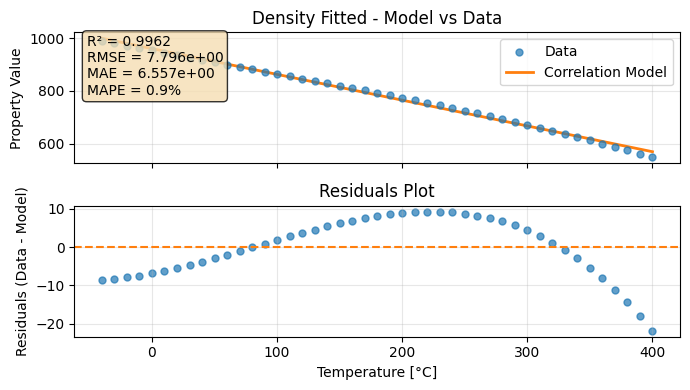

In [4]:
T_values = np.linspace(T_data.min(), T_data.max(), 100)
fig, axes = poly_corr.plot_correlation(T_data=T_data, y_data=y_data)
plt.tight_layout()
plt.show()

## Fit exponential correlation to viscosity data

Andrade equation - exponential decrease with temperature

In [5]:
viscosity_fit_params = {
    "bounds": {
        "A": (1e-8, 1e-3),  # Pre-exponential factor
        "B": (500, 5000),  # Activation energy parameter
        "C": (-1e-3, 1e-3),  # Offset
    },
    "initial_guess": {"A": 1e-6, "B": 2000, "C": 0},
}

T_data = syltherm_data["T_K"]
y_data = syltherm_data["viscosity"]

# Create a linear correlation model (2nd order polynomial)
exp_corr = ExponentialCorrelation(
    A=1e-6,
    B=2000,
    C=0,  # Will be fitted
    T_min=T_data.min(),
    T_max=T_data.max(),
    name="Viscosity Fitted",
)

# Fit to data
fit_results = exp_corr.fit(
    T_data,
    y_data,
    bounds=viscosity_fit_params["bounds"],
    initial_guess=viscosity_fit_params["initial_guess"],
)
fit_results

{'r_squared': np.float64(0.9990199275086719),
 'rmse': np.float64(0.00031017533490431553),
 'mae': np.float64(0.00024282723533394014),
 'objective_value': 4.329393227235194e-06,
 'solver_status': 'Solve_Succeeded',
 'fitted_parameters': {'A': np.float64(1.605328194832205e-05),
  'B': np.float64(1875.2218598688476),
  'C': np.float64(0.000213265937548324)},
 'correlation_type': 'exponential',
 'n_parameters': 3}

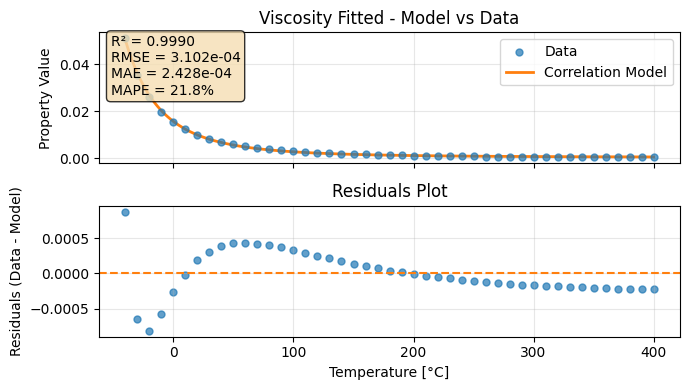

In [6]:
T_values = np.linspace(T_data.min(), T_data.max(), 100)
fig, axes = exp_corr.plot_correlation(T_data=T_data, y_data=y_data)
plt.tight_layout()
plt.show()

## Fit linear correlation to heat capacity

In [7]:
heat_capacity_fit_params = {
    "bounds": {
        "a0": (500, 2000),  # Intercept
        "a1": (0, 5),  # Slope term
    },
    "initial_guess": {"a0": 1000.0, "a1": 1.5},
}

T_data = syltherm_data["T_K"]
y_data = syltherm_data["heat_capacity"]

# Create a linear correlation model (2nd order polynomial)
poly_corr = PolynomialCorrelation(
    coefficients=[0, 0],  # Will be fitted
    T_min=T_data.min(),
    T_max=T_data.max(),
    name="Heat Capacity Fitted",
)

# Fit to data
fit_results = poly_corr.fit(
    T_data,
    y_data,
    bounds=heat_capacity_fit_params["bounds"],
    initial_guess=heat_capacity_fit_params["initial_guess"],
)
fit_results

{'r_squared': np.float64(0.9999984642379424),
 'rmse': np.float64(0.27482754781393237),
 'mae': np.float64(0.23318011028189478),
 'objective_value': 3.398858146683868,
 'solver_status': 'Solve_Succeeded',
 'fitted_parameters': {'a0': np.float64(1107.761630654303),
  'a1': np.float64(1.7075889328065887)},
 'correlation_type': 'polynomial',
 'n_parameters': 2}

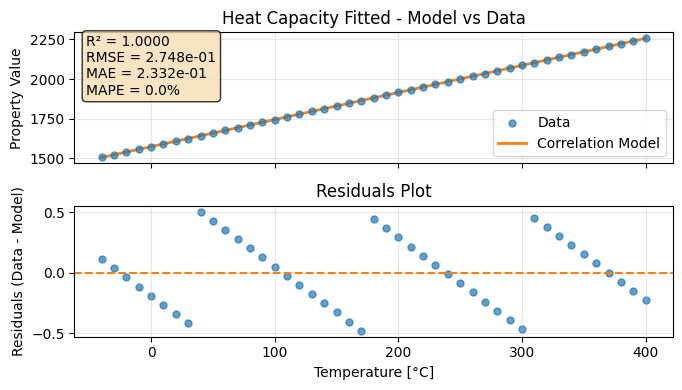

In [8]:
T_values = np.linspace(T_data.min(), T_data.max(), 100)
fig, axes = poly_corr.plot_correlation(T_data=T_data, y_data=y_data)
plt.tight_layout()
plt.show()

## Fit Antoine correlation to vapour pressure

In [9]:
vapor_pressure_fit_params = {
    "bounds": {
        "A": (0, 30),  # Antoine constant
        "B": (500, 2000),  # Antoine constant
        "C": (-10, 200),  # Antoine constant
    },
    "initial_guess": {"A": 10.0, "B": 2300, "C": -10.0},
}

T_data = syltherm_data["T_K"]
y_data = syltherm_data["vapor_pressure"]

# Create Antoine correlation
antoine_corr = AntoineCorrelation(
    A=10,
    B=1000,
    C=3,  # Will be fitted
    T_min=T_data.min(),
    T_max=T_data.max(),
    name="Vapor Pressure Fitted",
)

# There is a problem with the data for vapor pressure at low temperatures.
# The vapor pressure is stated as zero due to rounding errors.  Therefore,
# discard data for temperatures where vapor pressure data is zero.

# Fit to data
fit_results = antoine_corr.fit(
    T_data[y_data > 0],
    y_data[y_data > 0],
    bounds=vapor_pressure_fit_params["bounds"],
    initial_guess=vapor_pressure_fit_params["initial_guess"],
)
fit_results

{'r_squared': np.float64(0.99999991546735),
 'rmse': np.float64(118.39152937163296),
 'mae': np.float64(60.374188975413496),
 'objective_value': 518612.50639730645,
 'solver_status': 'Solve_Succeeded',
 'fitted_parameters': {'A': np.float64(7.994732342447175),
  'B': np.float64(964.9996753156803),
  'C': np.float64(119.63422147225175)},
 'correlation_type': 'antoine',
 'n_parameters': 3}

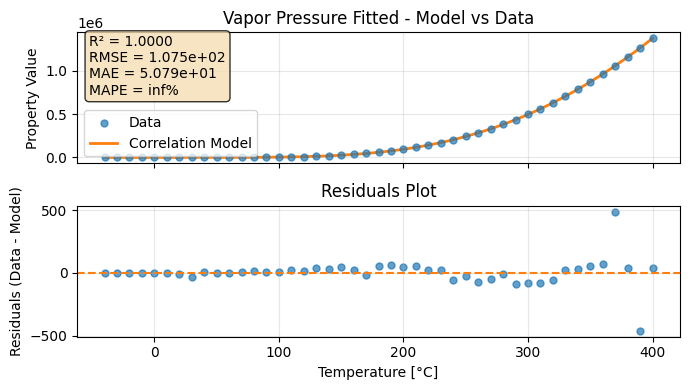

In [10]:
T_values = np.linspace(T_data.min(), T_data.max(), 100)
fig, axes = antoine_corr.plot_correlation(T_data=T_data, y_data=y_data)
plt.tight_layout()
plt.savefig("vapor_pressure_fit.png", dpi=300)
plt.show()

## Fit linear correlation to thermal conductivity

In [11]:
thermal_conductivity_fit_params = {
    "bounds": {
        "a0": (0, 10),  # Intercept
        "a1": (-2, 0),  # Slope term
    },
    "initial_guess": {"a0": 1000.0, "a1": 1.5},
}

T_data = syltherm_data["T_K"]
y_data = syltherm_data["thermal_conductivity"]

# Create a linear correlation model (2nd order polynomial)
poly_corr = PolynomialCorrelation(
    coefficients=[0, 0],  # Will be fitted
    T_min=T_data.min(),
    T_max=T_data.max(),
    name="Thermal Conductivity Fitted",
)

# Fit to data
fit_results = poly_corr.fit(
    T_data,
    y_data,
    bounds=thermal_conductivity_fit_params["bounds"],
    initial_guess=thermal_conductivity_fit_params["initial_guess"],
)
fit_results

{'r_squared': np.float64(0.9999977062333597),
 'rmse': np.float64(3.699336949153399e-05),
 'mae': np.float64(3.03880321530759e-05),
 'objective_value': 6.15829223851721e-08,
 'solver_status': 'Solve_Succeeded',
 'fitted_parameters': {'a0': np.float64(0.1902262221857051),
  'a1': np.float64(-0.0001882550397581208)},
 'correlation_type': 'polynomial',
 'n_parameters': 2}

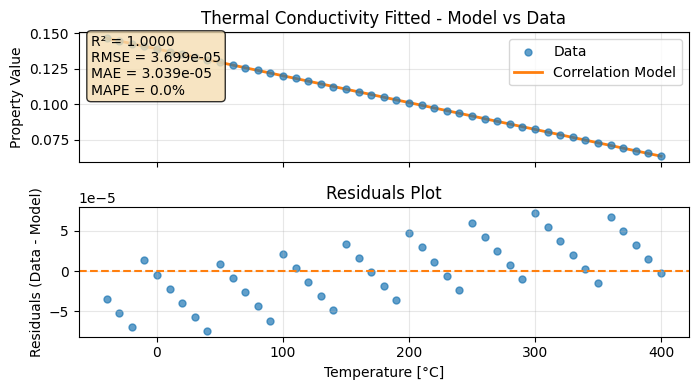

In [12]:
T_values = np.linspace(T_data.min(), T_data.max(), 100)
fig, axes = poly_corr.plot_correlation(T_data=T_data, y_data=y_data)
plt.tight_layout()
plt.show()